<a href="https://colab.research.google.com/github/RJGiannini/nft-project-group8/blob/main/collection_data10_13.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
import requests
import json
from pprint import pprint

In [4]:
# Upload collections_list.xlsx to Colab
from google.colab import files

csv_file = files.upload()

Saving collections_list.xlsx to collections_list.xlsx


In [5]:
# Read the collections_list.xlsx file from the Resources folder into a Pandas DataFrame
collections_df = pd.read_excel("collections_list.xlsx")

# Review the DataFrame
#collections_df

In [6]:
#collection_list
collection_list = [x for x in collections_df['Name']]

In [7]:
#collection_list_two
collection_list_two = []
for i in collection_list:
  collection_list_two.append(i.replace(" ", "-"))

In [8]:
#collection_list_three
collection_list_three = []
for i in collection_list_two:
  collection_list_three.append(i.lower())

In [9]:
df = pd.DataFrame()
for collection in collection_list_three:
  
  url = "https://api.opensea.io/api/v1/assets?order_by=sale_count&order_direction=desc&offset=0&limit=50&collection=" + collection

  JSONContent = requests.get(url).json()

  content = json.dumps(JSONContent, indent = 2, sort_keys=True)

  JSONContent.keys()

  df = df.append(JSONContent["assets"])

In [10]:
#df

In [11]:
collection_df = df['collection'].apply(pd.Series)
#collection_df

In [12]:
#Collection Name
collection_name = collection_df["name"].apply(pd.Series)
collection_name.columns = ['Collection Name']
#collection_name

In [13]:
last_sale_df = df['last_sale'].apply(pd.Series)
#last_sale_df

In [14]:
#Last Sale Price in ETH
total_price = last_sale_df['total_price'].apply(pd.Series)
total_price.columns = ['Last Sale Price ETH']
total_price = total_price.astype(float)* 0.000000000000000001
total_price = total_price.fillna(0)
#total_price

In [15]:
#payment_token_df = last_sale_df['payment_token'].apply(pd.Series)
#payment_token_df

In [16]:
#Current ETH TO USD price
#usd_price = payment_token_df['usd_price'].apply(pd.Series)
#usd_price.columns = ['ETH TO USD']
#usd_price = usd_price.astype(float)

In [17]:
background_color = df['background_color']
#background_color

In [173]:
#Creates New Columns and Lists Asset Traits
traits = df['traits'].apply(pd.Series)
traits.columns = ['Trait1', 'Trait2', 'Trait3', 'Trait4',
                  'Trait5', 'Trait6', 'Trait7', 'Trait8',
                  'Trait9', 'Trait10', 'Trait11', 'Trait12',
                  'Trait13', 'Trait14', 'Trait15', 'Trait16',
                  'Trait17', 'Trait18', 'Trait19']

traits

,Trait1,Trait2,Trait3,Trait4,Trait5,Trait6,Trait7,Trait8,Trait9,Trait10,Trait11,Trait12,Trait13,Trait14,Trait15,Trait16,Trait17,Trait18,Trait19
0,"{'trait_type': 'Strength', 'value': 3, 'displa...","{'trait_type': 'Spirit', 'value': 1, 'display_...","{'trait_type': 'Background', 'value': 'Citrine...","{'trait_type': 'Eyes', 'value': 'Open (Citrine...","{'trait_type': 'Style', 'value': 3, 'display_t...","{'trait_type': 'Mouth', 'value': 'Neutral', 'd...","{'trait_type': 'Head', 'value': 'Headphones (P...","{'trait_type': 'Hair', 'value': 'Bob (Rose)', ...","{'trait_type': 'Type', 'value': 'Y0K-A1', 'dis...","{'trait_type': 'Wear', 'value': 'Thermal Hoodi...","{'trait_type': 'Body', 'value': 'Jasper', 'dis...","{'trait_type': 'Extra', 'value': 'Void', 'disp...","{'trait_type': 'Face', 'value': 'Glasses (Obsi...",NaN,NaN,NaN,NaN,NaN,NaN
1,"{'trait_type': 'Eyes', 'value': 'Half Open (Az...","{'trait_type': 'Spirit', 'value': 2, 'display_...","{'trait_type': 'Style', 'value': 3, 'display_t...","{'trait_type': 'Strength', 'value': 5, 'displa...","{'trait_type': 'Body', 'value': 'Azurite', 'di...","{'trait_type': 'Face', 'value': 'Bandaid', 'di...","{'trait_type': 'Head', 'value': 'Void', 'displ...","{'trait_type': 'Wear', 'value': 'Bomber Jacket...","{'trait_type': 'Type', 'value': 'Y0K-A1', 'dis...","{'trait_type': 'Background', 'value': 'Azurite...","{'trait_type': 'Extra', 'value': 'Void', 'disp...","{'trait_type': 'Mouth', 'value': 'Smirk', 'dis...","{'trait_type': 'Hair', 'value': 'Spiky (Obsidi...",NaN,NaN,NaN,NaN,NaN,NaN
2,"{'trait_type': 'Extra', 'value': '0N1 Logo Pin...","{'trait_type': 'Wear', 'value': 'Kimono (Rose)...","{'trait_type': 'Background', 'value': 'Citrine...","{'trait_type': 'Head', 'value': 'Headphones (T...","{'trait_type': 'Style', 'value': 3, 'display_t...","{'trait_type': 'Eyes', 'value': 'Half Open (Ci...","{'trait_type': 'Body', 'value': 'Azurite', 'di...","{'trait_type': 'Mouth', 'value': 'Neutral', 'd...","{'trait_type': 'Face', 'value': 'Nose Scar', '...","{'trait_type': 'Hair', 'value': 'Bob (Obsidian...","{'trait_type': 'Spirit', 'value': 4, 'display_...","{'trait_type': 'Type', 'value': 'Y0K-A1', 'dis...","{'trait_type': 'Strength', 'value': 1, 'displa...",NaN,NaN,NaN,NaN,NaN,NaN
3,"{'trait_type': 'Extra', 'value': '0N1 Logo Pin...","{'trait_type': 'Hair', 'value': 'Spiky (Citrin...","{'trait_type': 'Face', 'value': 'PR Mask (Jasp...","{'trait_type': 'Style', 'value': 5, 'display_t...","{'trait_type': 'Body', 'value': 'Azurite', 'di...","{'trait_type': 'Mouth', 'value': 'Neutral', 'd...","{'trait_type': 'Spirit', 'value': 4, 'display_...","{'trait_type': 'Head', 'value': 'Headphones (P...","{'trait_type': 'Strength', 'value': 4, 'displa...","{'trait_type': 'Type', 'value': 'Y0K-A1', 'dis...","{'trait_type': 'Background', 'value': 'Azurite...","{'trait_type': 'Wear', 'value': 'Thermal Hoodi...","{'trait_type': 'Eyes', 'value': 'Squint (Azuri...",NaN,NaN,NaN,NaN,NaN,NaN
4,"{'trait_type': 'Face', 'value': 'Void', 'displ...","{'trait_type': 'Style', 'value': 4, 'display_t...","{'trait_type': 'Mouth', 'value': 'Frown', 'dis...","{'trait_type': 'Head', 'value': 'Headphones (T...","{'trait_type': 'Extra', 'value': '0N1 Logo Pin...","{'trait_type': 'Hair', 'value': 'Ponytail (Obs...","{'trait_type': 'Spirit', 'value': 4, 'display_...","{'trait_type': 'Strength', 'value': 4, 'displa...","{'trait_type': 'Eyes', 'value': 'Half Open (Ja...","{'trait_type': 'Type', 'value': 'Y0K-A1', 'dis...","{'trait_type': 'Body', 'value': 'Jasper', 'dis...","{'trait_type': 'Background', 'value': 'Jasper'...","{'trait_type': 'Wear', 'value': 'Track Jacket ...",NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46,"{'trait_type': 'breed_type', 'value': 'genesis...","{'trait_type': 'gender', 'value': 'Female', 'd...","{'trait_type': 'bloodline', 'value': 'Szabo', ...","{'trait_type': 'coat_color', 'value': 'Bleu De...","{'trait_type': 'genotype', 'value': 'Z4', 'dis...","{'

In [19]:
#Replaces NaN values with 0 and Trait Values with 1
traits[['Trait1', 'Trait2', 'Trait3', 'Trait4',
                  'Trait5', 'Trait6', 'Trait7', 'Trait8',
                  'Trait9', 'Trait10', 'Trait11', 'Trait12',
                  'Trait13', 'Trait14', 'Trait15', 'Trait16',
                  'Trait17', 'Trait18', 'Trait19']] = traits[['Trait1', 'Trait2', 'Trait3', 'Trait4',
                  'Trait5', 'Trait6', 'Trait7', 'Trait8',
                  'Trait9', 'Trait10', 'Trait11', 'Trait12',
                  'Trait13', 'Trait14', 'Trait15', 'Trait16',
                  'Trait17', 'Trait18', 'Trait19']].applymap(lambda x: 0 if pd.isnull(x) else 1)

In [20]:
#Calculates Sum of traits
total_traits = traits.apply(lambda row: row.Trait1 + row.Trait2 + row.Trait3
                            + row.Trait4 +row.Trait5 + row.Trait6 + row.Trait7
                            + row.Trait8 + row.Trait9 + row.Trait10 + row.Trait11 
                            + row.Trait12 + row.Trait13 + row.Trait14 + row.Trait15 
                            + row.Trait16 + row.Trait17 + row.Trait18 + row.Trait19 
                            , axis = 1)

In [21]:
collection_data_df = df[['name', 'token_id', 'num_sales', 'background_color',]].copy()

In [22]:
collection_data_df = pd.concat([collection_data_df, collection_name, total_price, total_traits], axis = 1)
collection_data_df.columns = ['Asset Name', 'Token ID', 'Number of Sales', 'Background Color', 'Collection Name', 'Last Sale Price (ETH)', 'Trait Count']

In [23]:
collection_data_df

,Asset Name,Token ID,Number of Sales,Background Color,Collection Name,Last Sale Price (ETH),Trait Count
0,0N1 #6911,6911,13,None,0N1 Force,1.740,13
1,0N1 #3338,3338,11,None,0N1 Force,2.750,13
2,0N1 #1601,1601,10,None,0N1 Force,2.250,13
3,0N1 #2181,2181,10,None,0N1 Force,2.200,13
4,0N1 #7012,7012,9,None,0N1 Force,3.450,13
...,...,...,...,...,...,...,...
46,Miss Thought,1910,3,None,Zed Run,1.000,6
47,Sussex Muster,1886,3,None,Zed Run,0.333,6
48,Pyro Hero,1394,3,None,Zed Run,0.450,6
49,Tornado,5256,3,None,Zed Run,0.190,6


In [24]:
collection_data_df.dtypes

Asset Name                object
Token ID                  object
Number of Sales            int64
Background Color          object
Collection Name           object
Last Sale Price (ETH)    float64
Trait Count                int64
dtype: object

In [25]:
collection_data_df["Background Color"].value_counts()

000000    52
6B80D9     8
262626     6
717AC3     4
3A65AD     4
           4
8AD9E9     3
7463E2     2
6F7DCF     2
887FCA     2
7F82CA     2
6972BE     2
4350B9     1
4053B4     1
5144AD     1
6BABD9     1
5CC5BA     1
A26BD9     1
7FA0CA     1
5551C5     1
AC8AE9     1
FF8A98     1
8A73DB     1
F185B3     1
97FDDA     1
Name: Background Color, dtype: int64

In [26]:
collection_data_df["Collection Name"].value_counts()

DeadFellaz                          50
Dreamloops                          50
Cool Cats NFT                       50
CrypToadz by GREMPLIN               50
CryptoHoots Steampunk Parliament    50
                                    ..
The Meta Key                         4
Bored Ape Chemistry Club             3
Non Fungible Fungi Genesis           2
Galaxy Eggs - old                    1
ZombieToadz                          1
Name: Collection Name, Length: 66, dtype: int64

In [27]:
ml_data_df = df[['id', 'num_sales']].copy()

In [28]:
ml_data_df = pd.concat([ml_data_df, total_price, total_traits], axis = 1)
ml_data_df.columns = ['Asset ID', 'Number of Sales','Last Sale Price (ETH)', 'Trait Count']

In [29]:
ml_data_df

,Asset ID,Number of Sales,Last Sale Price (ETH),Trait Count
0,38109417,13,1.740,13
1,38105661,11,2.750,13
2,37768360,10,2.250,13
3,38104277,10,2.200,13
4,38109401,9,3.450,13
...,...,...,...,...
46,3409840,3,1.000,6
47,3404105,3,0.333,6
48,3307434,3,0.450,6
49,14462054,3,0.190,6


In [30]:
ml_data_df.dtypes

Asset ID                   int64
Number of Sales            int64
Last Sale Price (ETH)    float64
Trait Count                int64
dtype: object

In [181]:
ml_data_df.describe()

,Asset ID,Number of Sales,Last Sale Price (ETH),Trait Count
count,5.000000e+01,50.000000,50.000000,50.0
mean,3.804183e+07,7.720000,2.549286,13.0
std,2.025163e+05,1.212856,1.466632,0.0
min,3.724191e+07,7.000000,0.000000,13.0
25%,3.810477e+07,7.000000,1.791250,13.0
50%,3.810608e+07,7.000000,2.139500,13.0
75%,3.810823e+07,8.000000,2.737500,13.0
max,3.811020e+07,13.000000,7.750000,13.0


In [175]:
import seaborn as sns

import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

%matplotlib inline

import seaborn as sns

from sklearn import linear_model

In [176]:
ml_data_df.shape

(50, 4)

In [177]:
ml_data_df = ml_data_df[~ml_data_df.index.duplicated()]

In [178]:
ml_data_df.columns

Index(['Asset ID', 'Number of Sales', 'Last Sale Price (ETH)', 'Trait Count'], dtype='object')

In [179]:
x = ml_data_df[['Number of Sales', 'Trait Count']]

In [180]:
y = ml_data_df['Last Sale Price (ETH)']

In [161]:
from sklearn.model_selection import train_test_split

In [162]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

In [174]:
from sklearn.linear_model import LinearRegression

In [164]:
model = LinearRegression()

In [165]:
model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [166]:
print(model.coef_)

[0.06161132 0.        ]


In [167]:
print(model.intercept_)

1.9359145552560646


In [168]:
pd.DataFrame(model.coef_, x.columns, columns = ['Coeff'])

,Coeff
Number of Sales,0.061611
Trait Count,0.000000


In [169]:
predictions = model.predict(x_test)

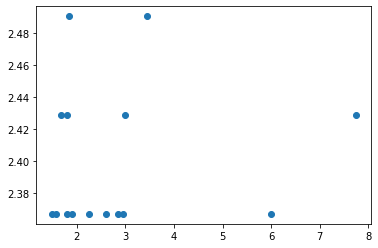

In [170]:
plt.scatter(y_test, predictions)

(array([7., 2., 4., 0., 0., 0., 0., 1., 0., 1.]),
 array([-0.8872938 , -0.26644493,  0.35440394,  0.9752528 ,  1.59610167,
         2.21695054,  2.83779941,  3.45864827,  4.07949714,  4.70034601,
         5.32119488]),
 <a list of 10 Patch objects>)

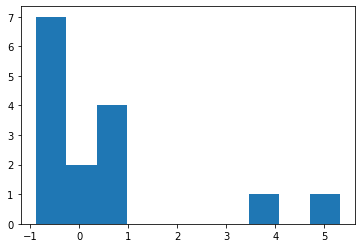

In [171]:
plt.hist(y_test - predictions)

In [123]:
from sklearn import metrics

In [124]:
metrics.mean_absolute_error(y_test, predictions)


0.9379942546385156

In [125]:
metrics.mean_squared_error(y_test, predictions)

1.2541480179553544

In [126]:
np.sqrt(metrics.mean_squared_error(y_test, predictions))

1.1198875023659092